<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [60]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('./data/job_listings.csv', index_col=0)
print(df.shape)
df.head()

(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [61]:
df.isnull().sum()

description    0
title          0
dtype: int64

In [62]:
df['title'].value_counts()

Data Scientist                                                 150
Senior Data Scientist                                           14
Junior Data Scientist                                           10
Associate Data Scientist                                         8
Data Scientist Intern                                            7
                                                              ... 
Data Scientist - Forecasting and Anomaly Detection Platform      1
Data Scientist, Insights - CU108                                 1
Data Scientist, Clients                                          1
Data Science Engineer                                            1
Data Scientist- Enterprise Product Analytics                     1
Name: title, Length: 177, dtype: int64

In [63]:
def clean_html(text):
    # convert text to bytes
    bytes = eval(text)
    # get text as string without html tags
    soup = BeautifulSoup(bytes, 'html.parser')
    return soup.get_text()

In [66]:
df['description'] = df['description'].apply(clean_html)

In [67]:
df.head(20)

,description,title
0,Job Requirements:\nConceptual understanding in...,Data scientist
1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,Location: USA â€“ multiple locations\n2+ years...,Data Scientist
5,Create various Business Intelligence Analytica...,Data Scientist
6,As Spotify Premium swells to over 96M subscrib...,Associate Data Scientist – Premium Analytics
7,"Everytown for Gun Safety, the nation's largest...",Data Scientist
8,MS in a quantitative discipline such as Statis...,Sr. Data Scientist
9,Slack is hiring experienced data scientists to...,"Data Scientist, Lifecyle"


## 2) Use Spacy to tokenize the listings 

In [44]:
nlp = spacy.load('en_core_web_lg')

In [71]:
def tokenize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc
              if not token.is_stop
              and not token.is_punct
              and not token.is_space]
    return tokens

In [72]:
df['tokens'] = df['description'].apply(tokenize)
df.head(10)

,description,title,tokens
0,Job Requirements:\nConceptual understanding in...,Data scientist,"[job, requirement, conceptual, understanding, ..."
1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I,"[job, description, Data, scientist, 1, help, b..."
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res..."
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,Location: USA â€“ multiple locations\n2+ years...,Data Scientist,"[location, USA, â€, multiple, location, 2, +, ..."
5,Create various Business Intelligence Analytica...,Data Scientist,"[create, Business, Intelligence, Analytical, r..."
6,As Spotify Premium swells to over 96M subscrib...,Associate Data Scientist – Premium Analytics,"[Spotify, Premium, swell, 96, M, subscriber, g..."
7,"Everytown for Gun Safety, the nation's largest...",Data Scientist,"[Everytown, Gun, Safety, nation, large, gun, v..."
8,MS in a quantitative discipline such as Statis...,Sr. Data Scientist,"[MS, quantitative, discipline, Statistics, Mat..."
9,Slack is hiring experienced data scientists to...,"Data Scientist, Lifecyle","[Slack, hire, experienced, datum, scientist, j..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=2
)

vect.fit(df['description'])

dtm = vect.transform(df['description'])

dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

print(dtm_df.shape)

dtm_df.head(10)

(426, 5283)


,00,000,03,04,06366,10,100,1001,105,1079302,...,yearsâ,yearthe,yes,yeti,york,young,yrs,zero,zf,zogsports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [99]:
top_20_most_used_words = dtm_df.sum().sort_values(ascending=False)[:20]
top_20_most_used_words

business       1212
work           1163
team            990
science         958
learning        919
analytics       736
machine         701
skills          697
analysis        680
models          617
product         583
statistical     576
solutions       530
new             529
ability         513
scientist       511
insights        464
help            458
technical       453
working         448
dtype: int64

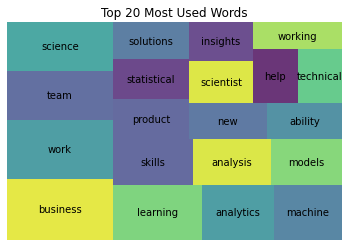

In [100]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=top_20_most_used_words, label=top_20_most_used_words.index, alpha=.8 )
plt.axis('off')
plt.title('Top 20 Most Used Words')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=2,
    ngram_range=(1,3),
    tokenizer=tokenize
)

dtm2 = tfidf.fit_transform(df['description'])

dtm2_df = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())

print(dtm2_df.shape)

dtm2_df.head()

(426, 49770)


,$,$ 10,$ 10 million,"$ 100,000","$ 100,000 $","$ 100,000 125,000","$ 100,908","$ 100,908 yearsummary","$ 125,000","$ 125,000 yeardescription",..., lead, lead collaboration, phd, phd ms, proven, proven track, run, run exploratory, vudu, vudu datum
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.195544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [103]:
from sklearn.neighbors import NearestNeighbors

nn_cv = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn_tfidf = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn_cv.fit(dtm_df)
nn_tfidf.fit(dtm2_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [104]:
my_ideal_ds_job = """
Data Engineer. Proficient in Python, spacy, pandas, and numpy. $115,000/yr. Develop machine learning models for use in penetration testing, binary analysis and fuzzing, source code auditing, software and hardware exploitation, and network intrusion detection.
"""

In [116]:
def display_best_jobs(ideal_job):
    print('\n---------- Count Vectorized Top 5 Jobs -------------')
    data_cv = vect.transform([ideal_job]).todense()
    knn_cv = nn_cv.kneighbors(data_cv)
    for job_index in knn_cv[1][0]:
        print('-'*10, df['title'][job_index], job_index, '-'*10)
        print(df['description'][job_index])

    print('\n---------- TF-IDF Top 5 Jobs -------------')
    data_tfidf = tfidf.transform([ideal_job]).todense()
    knn_tfidf = nn_tfidf.kneighbors(data_tfidf)
    for job_index in knn_tfidf[1][0]:
        print('-'*10, df['title'][job_index], job_index, '-'*10)
        print(df['description'][job_index])

In [117]:
display_best_jobs(my_ideal_ds_job)


---------- Count Vectorized Top 5 Jobs -------------
---------- Data Scientist 159 ----------
Experiment engineers will be expected to help define and develop our core software for designing and deploying advanced experiments.
---------- Data Scientist 105 ----------
Data Scientist duties will typically be focused on the customer’s business analytics, metrics collection, and analysis efforts to assist the customer’s management team in process improvement .
---------- Data Scientist 4 ----------
Location: USA â€“ multiple locations
2+ years of Analytics experience
Understand business requirements and technical requirements
Can handle data extraction, preparation and transformation
Create and implement data models
---------- Data Scientist 114 ----------
Arthur Lawrence is urgently looking for Data Scientist for the project in Palo Alto, CA. Please review the project details and respond at your earliest so we could proceed further.


Must Have:

6+ years' experience in similar projects.

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 